# Audio Frequency - Mean Cross

Based on CircuitPython code written by Dan Halbert.

In [71]:
import time
import csv
import matplotlib.pyplot as plt

In [125]:
# knobs
SAMPLERATE = 44000
SAMPLE_THRESH = 300

In [106]:
# load the mic data from file
DATA_FILE = "recorder_c5.dat"

t = []
samples = []
with open(DATA_FILE) as f:
    reader = csv.reader(f)
    for r in reader:
        t.append(float(r[0]))
        samples.append(float(r[1]))
        
NUM_SAMPLES = len(samples)

In [107]:
# calc DC offset
mean = int(sum(samples) / len(samples) + 0.5)
threshold = SAMPLE_THRESH + mean

In [108]:
# distance between falling mean-crossing points (mean represents a zero-crossing point)
crossings = []
deltas = []
last_xing_point = -1
high_peak = False
for i in range(NUM_SAMPLES-1):
    sample = samples[i]
    if sample > threshold:
        high_peak = True
    if high_peak and sample < mean:
        if last_xing_point != -1:
            crossings.append(i)
            deltas.append(i - last_xing_point)
        last_xing_point = i
        high_peak = False
        
if not deltas:
    print("No deltas found")
    while True:
        pass

In [109]:
# make reference data for plotting
t_crossings = []
s_crossings = []
for c in crossings:
    t_crossings.append(t[c])
    s_crossings.append(samples[c])
    
x_mean = [0, t[-1]]
y_mean = [mean, mean]

x_thresh = [0, t[-1]]
y_thresh = [threshold, threshold]

In [123]:
# average the crossings
mean = sum(deltas) / len(deltas)
freq = SAMPLERATE / mean
info_text = "crossings:{}  mean:{:0.2f}  freq:{:0.2f}".format(len(deltas), mean, freq)
print(info_text)

crossings:13  mean:70.23  freq:626.51


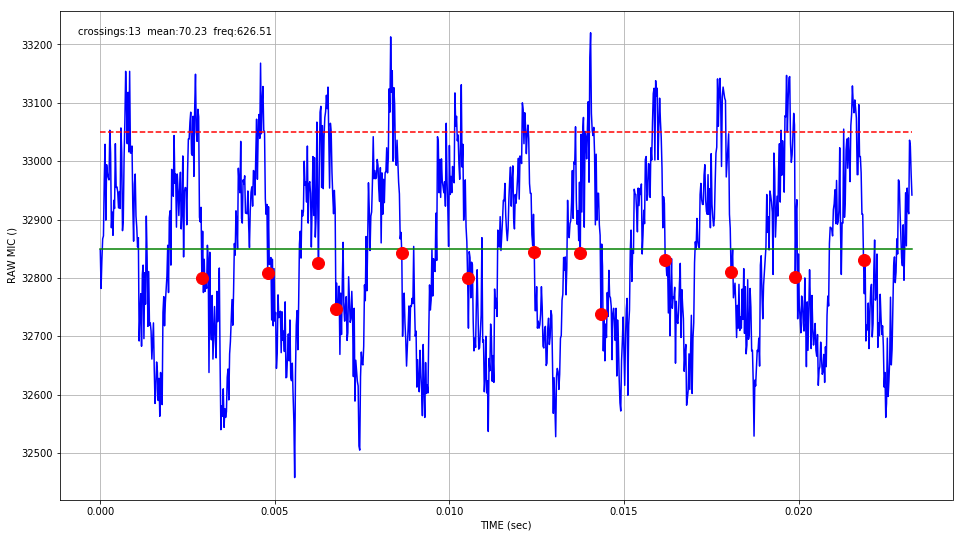

In [124]:
# plot results
fig = plt.figure(figsize=(16,9))
plt.plot(t, samples, "-b")
plt.plot(x_mean, y_mean, "-g")
plt.plot(x_thresh, y_thresh, "--r")
plt.plot(t_crossings, s_crossings, "or", markersize=12)
plt.xlabel("TIME (sec)")
plt.ylabel("RAW MIC ()")
plt.text(0.02, 0.95, info_text, transform=plt.gca().transAxes)
plt.grid(True)